# Logistic Regression of Pima Indians Diabetes

## Part 1 - Data Preprocessing

### Importing the dataset

In [32]:
#Import the library and load the dataset
import pandas as pd
dataset = pd.read_csv('diabetes.csv')

In [33]:
#dataset
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [34]:
#inspection of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
#Description of the data that shows what are the maximum and minimum values of a feature.
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
#no columns have missing values
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
#The columns in the dataset
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Cleaning

In [38]:
# Replace zeros with the mean of each column where zero is implausible
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].mean())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].mean())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [39]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Getting the inputs and output

In [40]:
X = dataset.drop(["Outcome"], axis = 1)
y = dataset["Outcome"]

In [41]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [42]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Creating the Training Set and the Test Set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [44]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
279,2,108.0,62.0,10.000000,278.000000,25.300000,0.881,22
258,1,193.0,50.0,16.000000,375.000000,25.900000,0.655,24
249,1,111.0,86.0,19.000000,79.799479,30.100000,0.143,23
740,11,120.0,80.0,37.000000,150.000000,42.300000,0.785,48
725,4,112.0,78.0,40.000000,79.799479,39.400000,0.236,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.900000,0.171,63
192,7,159.0,66.0,20.536458,79.799479,30.400000,0.383,36
629,4,94.0,65.0,22.000000,79.799479,24.700000,0.148,21
559,11,85.0,74.0,20.536458,79.799479,30.100000,0.300,35


In [45]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199.0,76.0,43.000000,79.799479,42.9,1.394,22
122,2,107.0,74.0,30.000000,100.000000,33.6,0.404,23
113,4,76.0,62.0,20.536458,79.799479,34.0,0.391,25
14,5,166.0,72.0,19.000000,175.000000,25.8,0.587,51
529,0,111.0,65.0,20.536458,79.799479,24.6,0.660,31
...,...,...,...,...,...,...,...,...
214,9,112.0,82.0,32.000000,175.000000,34.2,0.260,36
586,8,143.0,66.0,20.536458,79.799479,34.9,0.129,41
187,1,128.0,98.0,41.000000,58.000000,32.0,1.321,33
415,3,173.0,84.0,33.000000,474.000000,35.7,0.258,22


In [46]:
y_train

279    0
258    0
249    0
740    1
725    0
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 652, dtype: int64

In [47]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
214    1
586    1
187    1
415    1
283    1
Name: Outcome, Length: 116, dtype: int64

### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 

In [49]:
X_train

array([[-0.54921808, -0.44174164, -0.85762617, ..., -1.0424223 ,
         1.26393096, -0.95875201],
       [-0.84249424,  2.38142634, -1.85447634, ..., -0.9558182 ,
         0.57614012, -0.79199029],
       [-0.84249424, -0.34210042,  1.13607416, ..., -0.3495895 ,
        -0.9820409 , -0.87537115],
       ...,
       [ 0.03733424, -0.90673401, -0.60841363, ..., -1.1290264 ,
        -0.96682429, -1.04213287],
       [ 2.09026735, -1.20565768,  0.139224  , ..., -0.3495895 ,
        -0.5042393 ,  0.12519918],
       [ 0.33061039,  0.48824311,  0.80379077, ..., -0.07641445,
         0.53049029,  2.96014843]])

## Part 2 - Building and training the model

### Building the model

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [51]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [52]:
y_pred = model.predict(sc.transform(X_test))

In [53]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

Making the prediction of a single data point with:

1. Pregnancies = 10
2. Glucose = 130
3. BloodPressure = 70
4. SkinThickness = 70
5. Insulin = 80
6. BMI = 25
7. DiabetesPedigreeFunction = 1
8. Age = 21


In [54]:
model.predict(sc.transform([[10,130,70,70,80,25,1,21]]))

c:\Users\sydne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

## Part 3: Evaluating the model 

### Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[71,  7],
       [13, 25]])

In [56]:
cm =  confusion_matrix(y_test, y_pred)
cm

array([[71,  7],
       [13, 25]])

<Axes: >

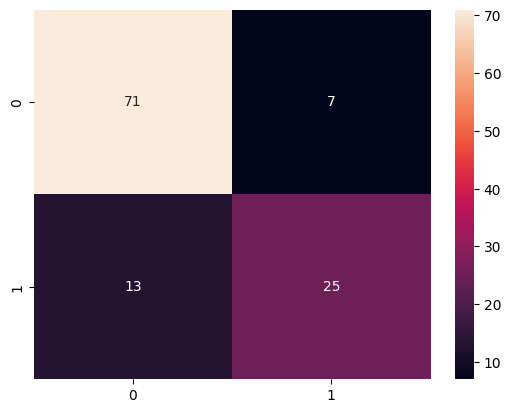

In [57]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        78
           1       0.78      0.66      0.71        38

    accuracy                           0.83       116
   macro avg       0.81      0.78      0.80       116
weighted avg       0.82      0.83      0.82       116



### Accuracy

In [59]:
(71+25)/(71+25+7+13)

0.8275862068965517

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8275862068965517